### Data Dictionary

Astronomy is one of the oldest data-driven sciences. In the late 1800s, the director of the Harvard College Observatory hired women to analyze astronomical data, which at the time was done using photographic glass plates. These women became known as the “Harvard Computers”. They computed the position and luminosity of various astronomical objects such as stars and galaxies. (If you are interested, you can learn more about the Harvard Computers). Today, astronomy is even more of a data-driven science, with an inordinate amount of data being produced by modern instruments every day.

In the following exercises we will analyze some actual astronomical data to inspect properties of stars, their absolute magnitude (which relates to a star's luminosity, or brightness), temperature and type (spectral class).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

#from pycaret.classification import *
#from pycaret.clustering import *
from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("stars.csv")

In [3]:
df

,star,magnitude,temp,type
0,Sun,4.8,5840,G
1,SiriusA,1.4,9620,A
2,Canopus,-3.1,7400,F
3,Arcturus,-0.4,4590,K
4,AlphaCentauriA,4.3,5840,G
...,...,...,...,...
91,*40EridaniB,11.1,10000,DA
92,*40EridaniC,12.8,2940,M
93,*70OphiuchiA,5.8,4950,K
94,*70OphiuchiB,7.5,3870,K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   star       96 non-null     object 
 1   magnitude  96 non-null     float64
 2   temp       96 non-null     int64  
 3   type       96 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


In [5]:
df.describe(include='all')

,star,magnitude,temp,type
count,96,96.000000,96.000000,96
unique,95,NaN,NaN,10
top,Altair,NaN,NaN,M
freq,2,NaN,NaN,32
mean,NaN,4.257292,8752.291667,NaN
std,NaN,7.354308,7727.858623,NaN
min,NaN,-8.000000,2500.000000,NaN
25%,NaN,-1.800000,3167.500000,NaN
50%,NaN,2.400000,5050.000000,NaN
75%,NaN,11.325000,9900.000000,NaN


In [6]:
df.shape

(96, 4)

In [7]:
df.columns

Index(['star', 'magnitude', 'temp', 'type'], dtype='object')

In [8]:
#Question 1 - Magnitude Mean & SD
df['magnitude'].mean()

4.257291666666667

In [9]:
df['magnitude'].std()

7.354307649858819

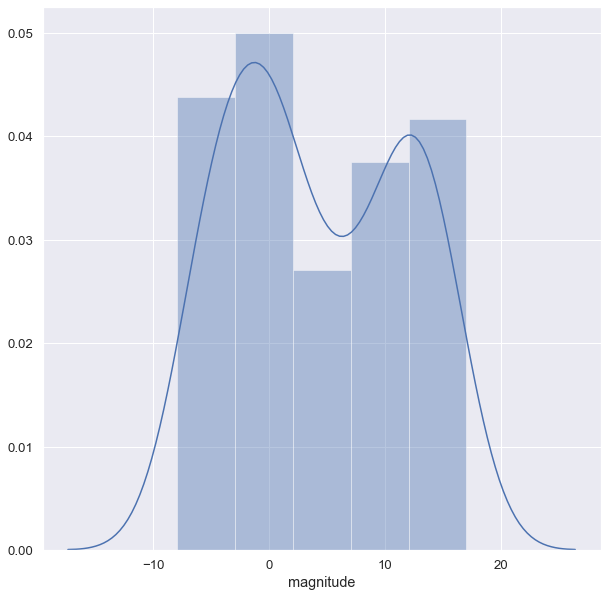

In [10]:
#Question 2 - Magnitude Density Plot
plt.figure(figsize=(10,10))
sns.distplot(a=df['magnitude'])
plt.show()

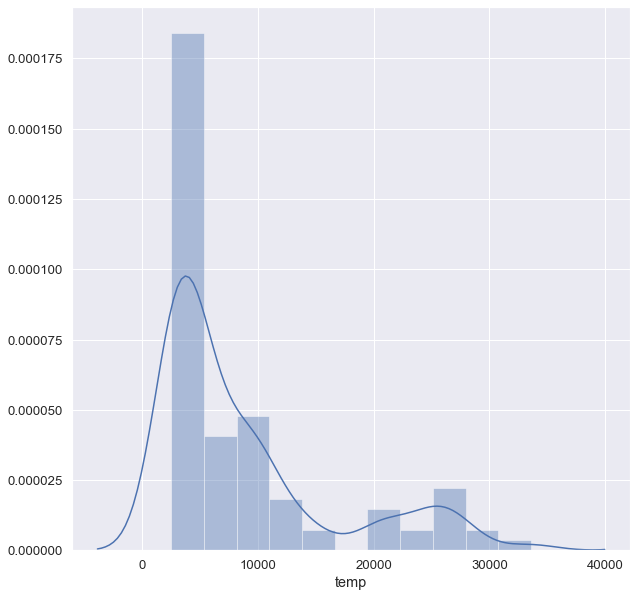

In [11]:
#Question 3 - Temperature Distribution
plt.figure(figsize=(10,10))
sns.distplot(a=df['temp'])
plt.show()

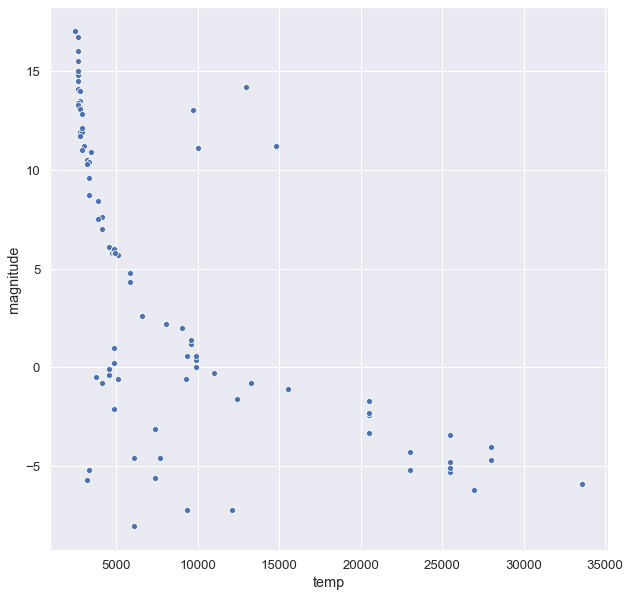

In [12]:
#Question 4 - Temperature & Magnitude Scatter
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['temp'],y=df['magnitude'],data=df)
plt.show()

In [13]:
#Question 5 - transform the plot to astronomical standards, lower magnitudes are on top

In [14]:
#Question 6 - Look for stars that are of higher temp and higher magnitude, how many?
df['temp'].max()

33600

In [15]:
df[df['temp']==33600]

,star,magnitude,temp,type
34,Alnitak,-5.9,33600,O


In [16]:
#Question 7 - Look for stars that are of lower temp and lower magnitude, Avg temp?

In [17]:
#Question 8 - Find the following:
    # least luminous star with temp greater than 5000 - White Dwarf: van Maanen's Star
    # the 2 stars with lowest temperaturs and highest luminosity - Supergiants: Betelgeuse & Antares
    # classification of the sun - Main Sequence Star

In [18]:
#Question 9 - Classifying the stars by colour

### Data Visualization

### Univariate Data Exploration

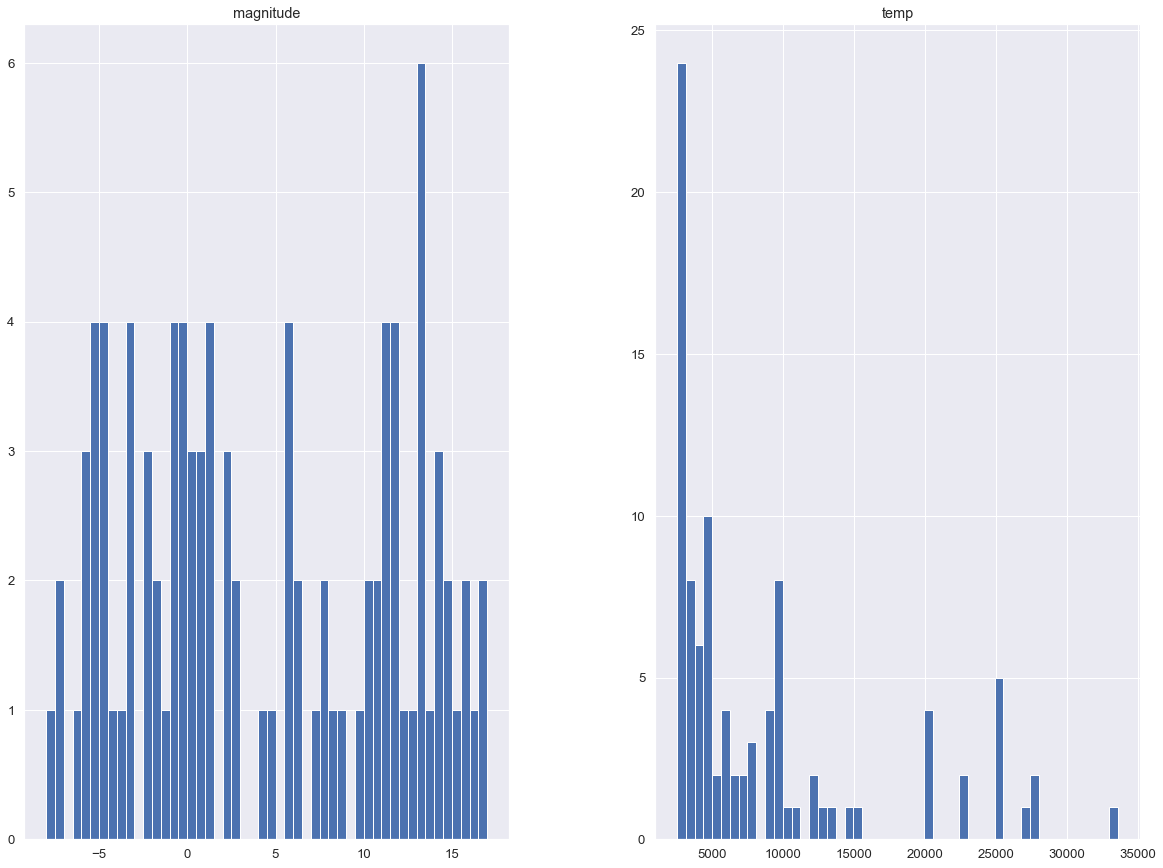

In [19]:
df.hist(bins=50, figsize=(20,15));

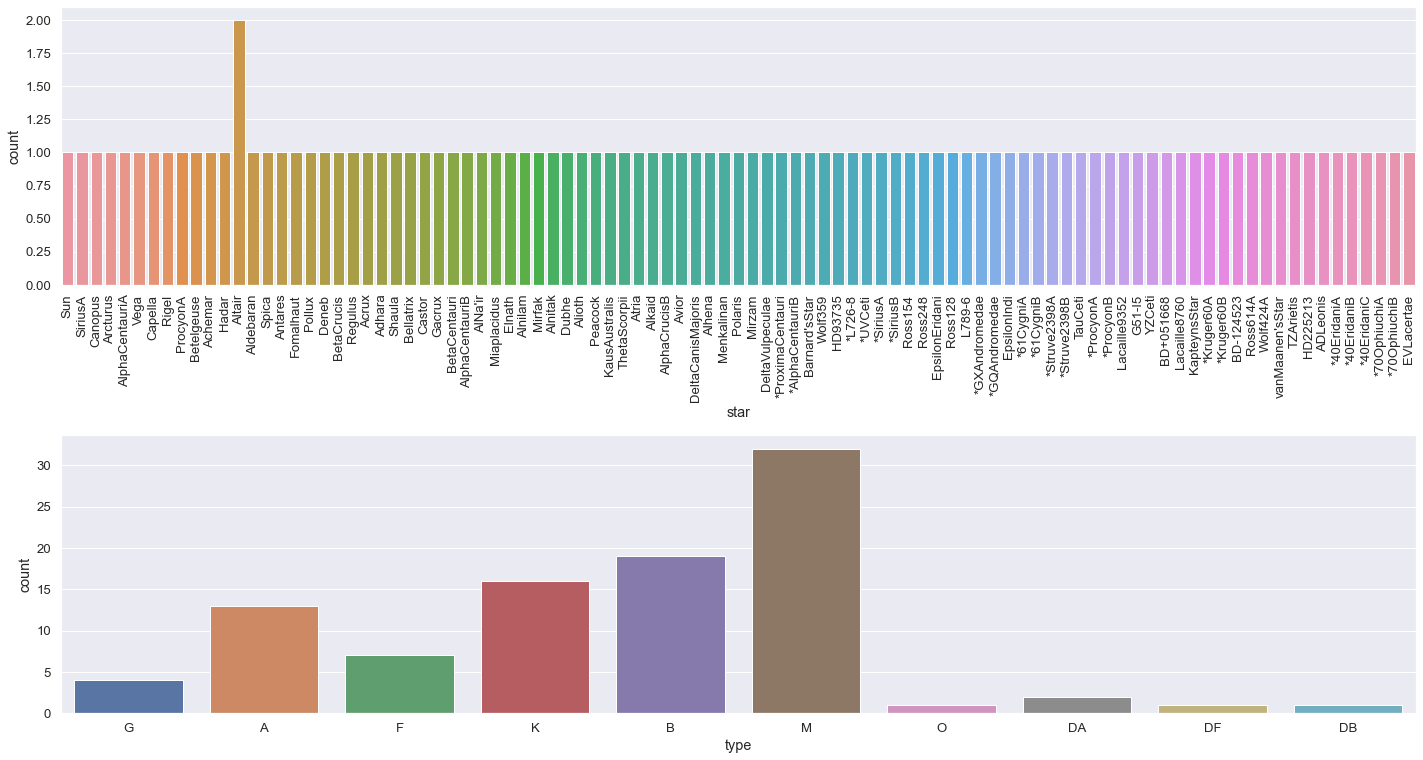

In [20]:
fig = plt.figure(figsize=(20,40))

plt.subplot(711)
plt.xticks(rotation=90)
sns.countplot(x='star', data=df)

plt.subplot(712)
sns.countplot(x='type', data=df)

plt.tight_layout()
plt.show()

In [21]:
df.corr()

,magnitude,temp
magnitude,1.000000,-0.633191
temp,-0.633191,1.000000


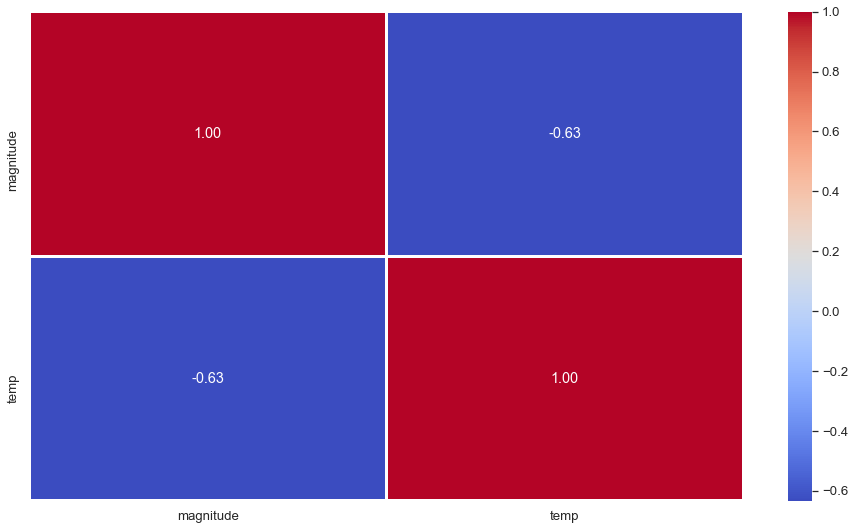

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

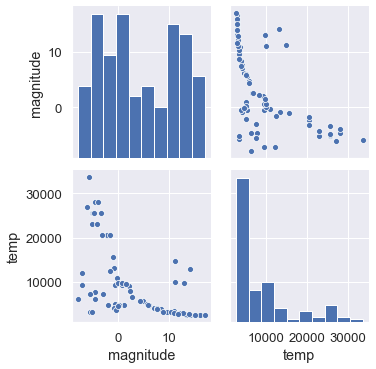

In [23]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [24]:
df.isnull().sum()

star         0
magnitude    0
temp         0
type         0
dtype: int64

### Treat Duplicate Values

In [25]:
df.duplicated(keep='first').sum()

1

In [26]:
df[df.duplicated(keep=False)]

,star,magnitude,temp,type
12,Altair,2.2,8060,A
88,Altair,2.2,8060,A


In [27]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [28]:
df

,star,magnitude,temp,type
0,Sun,4.8,5840,G
1,SiriusA,1.4,9620,A
2,Canopus,-3.1,7400,F
3,Arcturus,-0.4,4590,K
4,AlphaCentauriA,4.3,5840,G
...,...,...,...,...
90,*40EridaniB,11.1,10000,DA
91,*40EridaniC,12.8,2940,M
92,*70OphiuchiA,5.8,4950,K
93,*70OphiuchiB,7.5,3870,K


### Drop unwanted features

In [29]:
df.columns

Index(['star', 'magnitude', 'temp', 'type'], dtype='object')

In [30]:
#df.drop()

In [31]:
#df

### Create and save processed dataset

In [32]:
#df.to_csv("",index=False)

### Model Training

### Using PyCaret

In [33]:
exp_reg = setup(data = df, target = 'magnitude', session_id=123, normalize=True) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(95, 4)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [34]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.725400,17.074500,3.731800,0.496000,0.690600,-1.636600
1,Random Forest,2.870000,19.186800,4.052400,0.490100,0.713800,-1.271100
2,AdaBoost Regressor,3.230900,19.478700,4.120100,0.458100,0.648500,-0.716400
3,Extreme Gradient Boosting,2.859700,19.101100,3.979400,0.444000,0.720000,-1.723400
4,K Neighbors Regressor,2.838900,17.880700,3.866500,0.440300,0.689100,-1.120000
5,Gradient Boosting Regressor,2.867400,18.876900,3.944500,0.436200,0.750400,-1.777500
6,TheilSen Regressor,2.996600,18.766700,3.974700,0.363700,0.666900,-1.499400
7,Passive Aggressive Regressor,3.000100,18.790300,3.978900,0.363100,0.667600,-1.497800
8,Linear Regression,2.985100,18.615000,3.950300,0.362800,0.652500,-1.522700
9,Bayesian Ridge,2.985100,18.615000,3.950300,0.362800,0.652500,-1.522700


In [35]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2925,1.9093,1.3818,0.9481,0.4739,-0.7153
1,1.6320,4.6278,2.1512,0.9134,0.2971,0.0647
2,3.7666,20.5838,4.5369,-1.0008,0.8719,-3.8811
3,5.7449,52.4178,7.2400,0.2354,0.8166,-2.2932
4,2.7203,24.7431,4.9742,0.3437,0.9326,0.2849
5,3.2218,17.9215,4.2334,0.5747,1.0947,-10.8906
6,2.8873,10.3609,3.2188,0.7663,0.6169,0.1324
7,1.4702,3.9077,1.9768,0.8723,0.2622,0.3204
8,2.9480,29.5789,5.4386,0.4888,1.0740,0.2209
9,1.5698,4.6939,2.1665,0.8183,0.4663,0.3909


In [36]:
print(cat)

In [37]:
tuned_cat = tune_model('catboost', optimize='mse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4187,2.7579,1.6607,0.9251,0.6096,-1.0331
1,1.6256,4.5206,2.1262,0.9154,0.3033,0.1009
2,3.1336,14.3444,3.7874,-0.3943,0.7066,-2.5541
3,5.6028,53.6790,7.3266,0.2170,0.8051,-2.1507
4,2.8072,23.5041,4.8481,0.3765,0.9364,0.2342
5,2.9219,14.2256,3.7717,0.6624,1.0252,-9.0209
6,3.7073,16.2398,4.0299,0.6336,1.0444,-0.0586
7,1.8881,5.5147,2.3483,0.8198,0.3617,0.5589
8,3.0395,28.9544,5.3809,0.4996,1.0629,0.2023
9,1.9700,5.1431,2.2678,0.8009,0.5098,0.6637


In [38]:
print(tuned_cat)

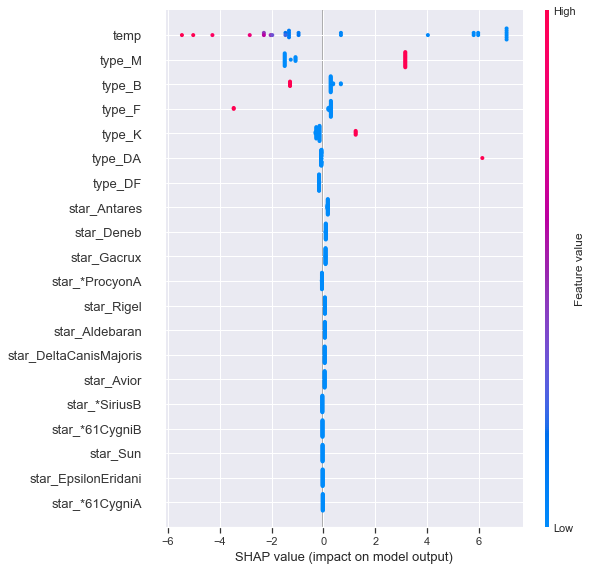

In [39]:
interpret_model(tuned_cat)

In [40]:
predict_model(tuned_cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.9642,21.9741,4.6877,0.6015,0.631,0.5224


,temp,star_*40EridaniA,star_*40EridaniB,star_*40EridaniC,star_*61CygniA,star_*61CygniB,star_*70OphiuchiA,star_*70OphiuchiB,star_*AlphaCentauriB,star_*GQAndromedae,...,type_DA,type_DB,type_DF,type_F,type_G,type_K,type_M,type_O,magnitude,Label
0,-0.467107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.7,1.0867
1,-0.771214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.5,12.8128
2,0.878731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.1,-1.8277
3,-0.788037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.7,13.9086
4,0.160520,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,6.8962
5,-0.377815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.3,1.0867
6,0.471098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.6,-1.8277
7,-0.771214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.9,12.8128
8,-0.683217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.9,7.5135
9,-0.753097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.9,12.6386
